# Traffic Sign Classification Using SVM

Dataset used- German Traffic Sign Recognition Dataset (GTSRB). 


## Methods implemented in this notebook:
- SVC(kernel='linear')
- BaggingClassifier using OneVSRestClassifier

My Google Drive link to pickled dataset file- https://drive.google.com/open?id=1W5xABCisEdAsyCGmLY5k3V59Kh_iscP7

Coded on Google colaboratory, mounting google drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries 

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import torch
from sklearn.svm import SVC
from sklearn import metrics

## Reading training, test and validation data in a dataframe

In [0]:
train_df= pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/train.p')
test_df = pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/test.p')
val_df = pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/valid.p')

## Selecting image features and labels as data input and output

In [0]:
X_train, y_train = train_df['features'], train_df['labels']
X_test, y_test = test_df['features'], test_df['labels']
X_val, y_val = val_df['features'], val_df['labels']


## Plotting histogram for training data

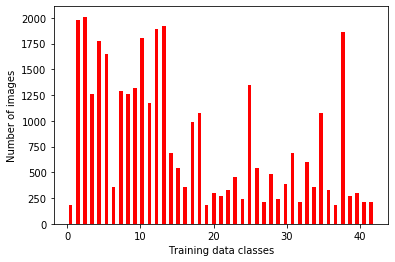

In [40]:
hist, bins = np.histogram(y_train, bins=43)
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist, width=0.5, color = 'red')

plt.xlabel("Training data classes")
plt.ylabel("Number of images")
plt.show()


## Function to convert RGB images to grayscale images

In [0]:
def convert_to_grayscale(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return gray

## Function to perform Gaussian blurring on grayscale data

In [0]:
# Gaussian filter is performed in Canny detection, this step is to see the 
#transformation in data and to see how Gaussian blur reduces noise in the images
def blur_image(image):
  blur = cv2.GaussianBlur(image,(3,3),0)
  return blur

## Canny Edge detection function that takes input as grayscale images and gives edge detected images as output

In [0]:
def canny_edge_detection(image):
  edges = cv2.Canny(image,30,40)
  return edges

## Preprocessing input data using defined functions



In [0]:
grayscale_train = list(map(convert_to_grayscale,X_train))
blur_train = list(map(blur_image,grayscale_train))
edge_detection_train = list(map(canny_edge_detection, blur_train))

## Checking the images after each step of preprocessing

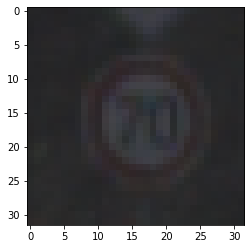

In [36]:
plt.imshow(X_train[7000],cmap= "gray")

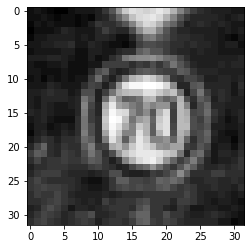

In [37]:
plt.imshow(grayscale_train[7000],cmap= "gray")

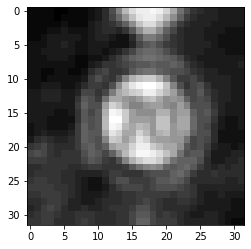

In [38]:
plt.imshow(blur_train[7000],cmap= "gray")

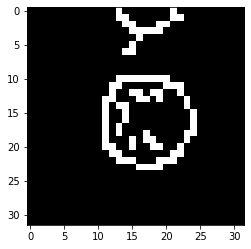

In [39]:
plt.imshow(edge_detection_train[7000],cmap= "gray")

## Preprocessing test images

In [0]:
grayscale_test = list(map(convert_to_grayscale,X_test))

blur_test = list(map(blur_image,grayscale_test))

edge_detection_test = list(map(canny_edge_detection, grayscale_test))


## Converting lists of images to numpy array

In [0]:
edge_detection_train = np.asarray(edge_detection_train, dtype=np.float32)
edge_detection_test = np.asarray(edge_detection_test, dtype=np.float32)

## Flattening the numpy array to reduce dimenions before passing to classifier

In [0]:
n_samples_train = len(X_train)
n_samples_test = len(X_test)

flatten_train = edge_detection_train.reshape((n_samples_train, -1))
flatten_test = edge_detection_test.reshape((n_samples_test, -1))

## Using 'SVC' from sklearn.svm

In [32]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(flatten_train, y_train)
y_pred_svc = svclassifier.predict(flatten_test)
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
print("Accuracy:",accuracy_svc)

Accuracy: 0.6790973871733966


## **Accuracy of SVC(kernel = 'linear') : 67.90%**

## Using BaggingClassifier with SVC as ensemble classifiers tend to give more accuracy than SVM classifiers-

In [27]:


n_estimators = 10
clf_bagging = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf_bagging.fit(flatten_train, y_train)
print("Bagging SVC score", clf_bagging.score(flatten_train, y_train))
proba = clf_bagging.predict(flatten_test)

filename = 'SVC_Bagging_model.sav'
path = F"/content/drive/My Drive/{filename}" 
torch.save(clf_bagging, path)

y_pred_bagging = clf_bagging.predict(flatten_test)
accuracy_bagging = metrics.accuracy_score(y_test, y_pred_bagging)
print("Accuracy:",accuracy_bagging)


Bagging SVC score 0.8177821201758672
Accuracy: 0.6749010292953286


In [28]:
print(metrics.confusion_matrix(y_test, y_pred_bagging))

[[ 26  15   4 ...   0   0   0]
 [ 16 441  95 ...   9   0   1]
 [  2  45 593 ...   4   1   0]
 ...
 [  0   1   0 ...  53   0   0]
 [  0   0   0 ...   0  19   2]
 [  0   3   0 ...   0   3  45]]


## Predicted classes histogram by Bagging classifier

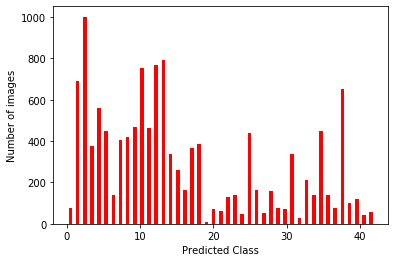

In [33]:
hist, bins = np.histogram(y_pred_bagging, bins=43)
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist, width=0.5, color = 'red')

plt.xlabel("Predicted Class")
plt.ylabel("Number of images")
plt.show()


## Actual test data classes

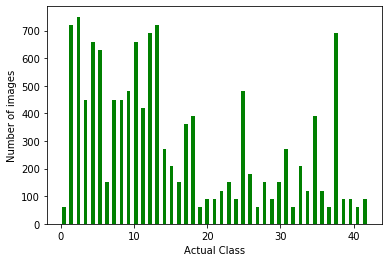

In [34]:

hist, bins = np.histogram(y_test, bins=43)
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist, width=0.5, color = 'green')

plt.xlabel("Actual Class")
plt.ylabel("Number of images")
plt.show()

## **Accuracy of SVC Bagging Classifier: 67.49%**

# References:
- https://blog.hyperiondev.com/index.php/2019/02/18/machine-learning/
- https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
- https://github.com/mohamedameen93/German-Traffic-Sign-Classification-Using-TensorFlow/blob/master/Traffic_Sign_Classifier.ipynb